# 3.1 이미지 다운

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from PIL import Image

# 이미지 로드 (없을 시 가상 데이터 생성)
try:
    img = Image.open('/content/samples.image.webp').convert('RGB')
    img_np = np.array(img) / 255.0
except:
    img_np = np.random.rand(200, 200, 3)

print(img_np.shape)

w, h, d = img_np.shape
# [TODO] 미션 3-1: 3차원 이미지를 (픽셀수, 3) 형태의 2차원으로 변환하세요.
pixel_data = img_np.reshape(-1, 3)


### 3.2 컬러 양자화 (Color Quantization)

In [ ]:
# [TODO] 미션 3-2: MiniBatchKMeans를 사용하여 16개의 대표 색상을 추출하세요.
K = 8
kmeans = MiniBatchKMeans(n_clusters= K, random_state=42)
labels = kmeans.fit_predict(pixel_data)
centers = kmeans.cluster_centers_
print(centers)

# [TODO] 미션 3-3: 추출된 색상(centers)으로 이미지의 모든 픽셀을 교체하세요.
quantized_pixel_data = centers[labels]
quantized_img = quantized_pixel_data.reshape(w, h, d)

[[0.54830663 0.63656682 0.62160153]
 [0.07068481 0.13028441 0.11617996]
 [0.4109786  0.75768024 0.93570967]
 [0.87824215 0.9577391  0.97484135]
 [0.21330906 0.28655095 0.26360997]
 [0.08288719 0.63225787 0.88595614]
 [0.69026268 0.79809159 0.83019307]
 [0.3771105  0.4752001  0.4197951 ]]


### 3.3 결과 시각화

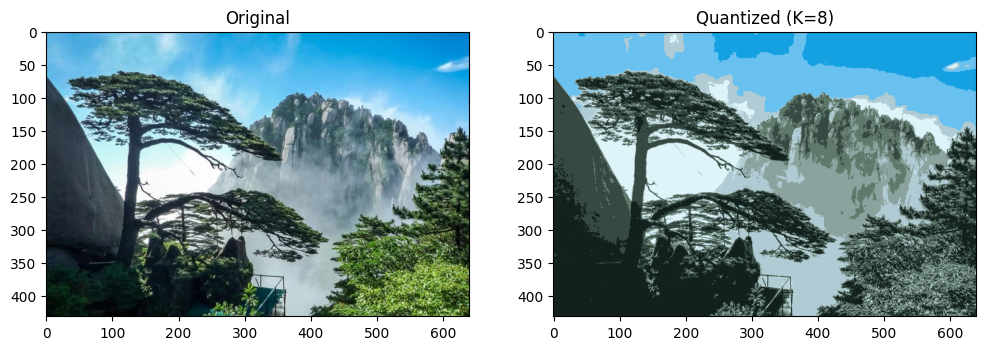

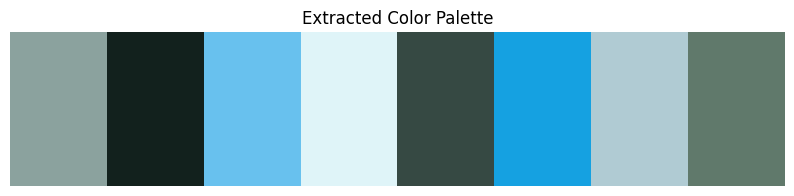

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_np)
ax[0].set_title("Original")
ax[1].imshow(quantized_img)
ax[1].set_title(f"Quantized (K={K})")
plt.show()

# 추출된 팔레트 확인
plt.figure(figsize=(10, 2))
plt.imshow([centers], aspect='auto')
plt.title("Extracted Color Palette")
plt.axis('off')
plt.show()